### AlexNet

In [1]:
from PIL import Image
from skimage import transform
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn.functional as F
from torchvision import models
from torchvision import transforms

In [2]:
model = models.alexnet(weights='AlexNet_Weights.DEFAULT')
print(model)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

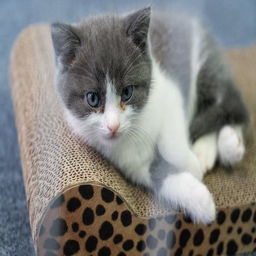

In [3]:
img = Image.open('../../data/imagenet/cat.jpg')
img.resize((256,256))

In [4]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

In [5]:
img_t = transform(img)
img_t.shape

torch.Size([3, 224, 224])

In [6]:
batch_t = torch.unsqueeze(img_t, 0)
batch_t.shape

torch.Size([1, 3, 224, 224])

In [7]:
model.eval()
output = model(batch_t)
output.size()

torch.Size([1, 1000])

In [8]:
pred = torch.argmax(output, dim=1)
pred

tensor([283])

In [9]:
with open('../../data/imagenet/imagenet_classes.txt') as f:
    classes = [line.strip() for line in f.readlines()]

print(f"Number of classes: {len(classes)}")

Number of classes: 1000


In [10]:
print(f"Prediction: {classes[pred[0]]}")

Prediction: Persian cat


In [11]:
_, indices = torch.sort(output, descending=True)
percentage = F.softmax(output, dim=1)[0] * 100
for index in indices[0][:10]:
    print(f'Prediction: {classes[index]} - Confidence: {round(percentage[index].item(), 2)} %') 

Prediction: Persian cat - Confidence: 78.53 %
Prediction: tabby, tabby cat - Confidence: 5.74 %
Prediction: tiger cat - Confidence: 4.07 %
Prediction: hamper - Confidence: 2.03 %
Prediction: remote control, remote - Confidence: 1.33 %
Prediction: Egyptian cat - Confidence: 1.31 %
Prediction: Angora, Angora rabbit - Confidence: 0.89 %
Prediction: Pomeranian - Confidence: 0.87 %
Prediction: washer, automatic washer, washing machine - Confidence: 0.65 %
Prediction: black-footed ferret, ferret, Mustela nigripes - Confidence: 0.61 %


### Transformers

In [18]:
from transformers import ViTConfig, ViTModel, ViTImageProcessor
from datasets import load_dataset

In [15]:
configuration = ViTConfig()
model = ViTModel(configuration)
configuration = model.config

In [17]:
print(model)

ViTModel(
  (embeddings): ViTEmbeddings(
    (patch_embeddings): ViTPatchEmbeddings(
      (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (dropout): Dropout(p=0.0, inplace=False)
  )
  (encoder): ViTEncoder(
    (layer): ModuleList(
      (0-11): 12 x ViTLayer(
        (attention): ViTAttention(
          (attention): ViTSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
          (output): ViTSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
        )
        (intermediate): ViTIntermediate(
          (dense): Linear(in_features=768, out_features=3072, bias=True)
          (intermediate_act_fn): GELUActivation(

In [ ]:
dataset = load_dataset("huggingface/cats-image")
image = dataset["test"]["image"][0]

In [ ]:
features_extractor = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224-in21k")
features_extractor

In [ ]:
model = ViTModel.from_pretrained("google/vit-base-patch16-224-in21k")
model

In [27]:
inputs = features_extractor(images=image, return_tensors="pt")
with torch.no_grad():
    outputs = model(**inputs)

In [ ]:
logits = outputs.logits